In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from gensim import corpora, models
from sklearn.manifold import TSNE
from scipy.stats import ttest_ind

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets') 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/Anita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Anita/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /Users/Anita/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Anita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Anita/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('music_df.csv')

In [3]:
df.head()

,lyrics,num_syllables,pos,year,fog_index,flesch_index,num_words,num_lines,title,f_k_grade,...,tempo,duration_ms,time_signature,uri,analysis_url,artist_with_features,year_bin,image,cluster,Gender
0,"Mona Lisa, Mona Lisa, men have named you\nYou'...",189.0,0.199,1950,5.2,88.74,145,17,Mona Lisa,2.9,...,86.198,207573.0,3,spotify:track:3k5ycyXX5qsCjLd7R2vphp,https://api.spotify.com/v1/audio-analysis/3k5y...,NaN,50s,https://i.scdn.co/image/a4c0918f13b67aa8d9f4ea...,String Lover,male
1,I wanna be Loved\nBy Andrews Sisters\n\nOooo-o...,270.9,0.224,1950,4.4,82.31,189,31,I Wanna Be Loved,3.3,...,170.869,198027.0,5,spotify:track:4UY81WrDU3jTROGaKuz4uZ,https://api.spotify.com/v1/audio-analysis/4UY8...,Gordon Jenkins,50s,https://i.scdn.co/image/42e4dc3ab9b190056a1ca1...,String Lover,Group
2,I was dancing with my darling to the Tennessee...,174.6,0.351,1950,5.2,88.74,138,16,Tennessee Waltz,2.9,...,86.335,182733.0,3,spotify:track:6DKt9vMnMN0HmlnK3EAHRQ,https://api.spotify.com/v1/audio-analysis/6DKt...,NaN,50s,https://i.scdn.co/image/353b05113b1a140d64d83d...,String Lover,female
3,Each time I hold someone new\nMy arms grow col...,135.9,0.231,1950,4.4,99.23,117,18,I'll Never Be Free,0.9,...,82.184,158000.0,3,spotify:track:0KnD456yC5JuweN932Ems3,https://api.spotify.com/v1/audio-analysis/0KnD...,Kay Starr,50s,https://i.scdn.co/image/4bd427bb9181914d0fa448...,String Lover,male
4,"Unfortunately, we are not licensed to display ...",46.8,0.079,1950,6.0,69.79,32,3,All My Love,6.0,...,123.314,190933.0,4,spotify:track:05sXHTLqIpwywbpui1JT4o,https://api.spotify.com/v1/audio-analysis/05sX...,NaN,50s,https://i.scdn.co/image/353b05113b1a140d64d83d...,String Lover,female


In [4]:
# remove songs not in the '80s
# Get names of indexes for which column year_bin is not 80's
indexNames = df[df['year_bin'] != "80s" ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [5]:
df.head(10) #it worked!

,lyrics,num_syllables,pos,year,fog_index,flesch_index,num_words,num_lines,title,f_k_grade,...,tempo,duration_ms,time_signature,uri,analysis_url,artist_with_features,year_bin,image,cluster,Gender
1385,"Color me your color, baby\nColor me your car\n...",304.2,0.173,1980,4.0,91.78,229,39,Call Me,1.7,...,142.167,212893.0,4,spotify:track:0vLwL4xuJ3s7SeaCdvMqkY,https://api.spotify.com/v1/audio-analysis/0vLw...,NaN,80s,https://i.scdn.co/image/dbd371b220a054a542279f...,String Lover,Group
1386,Come take my hand\nYou should know me\nI've al...,308.7,0.204,1980,4.0,91.78,244,41,Magic,1.7,...,103.615,274053.0,4,spotify:track:5Zpjf07lpZxADR0vWZnTtL,https://api.spotify.com/v1/audio-analysis/5Zpj...,NaN,80s,https://i.scdn.co/image/a9c4bea41f06c1be30efa9...,String Lover,female
1387,"Girl, close your eyes\nLet that rhythm get int...",290.7,0.124,1980,4.0,108.70,254,44,Rock With You,-0.7,...,114.031,220627.0,4,spotify:track:7oOOI85fVQvVnK5ynNMdW7,https://api.spotify.com/v1/audio-analysis/7oOO...,NaN,80s,https://i.scdn.co/image/51dad9aaabe56438188402...,Poetic,male
1388,Do that to me one more time\nOnce is never eno...,254.7,0.112,1980,4.8,89.75,200,26,Do That To Me One More Time,2.5,...,90.007,251960.0,4,spotify:track:4NYJZhGW8fHbGmweplQQwv,https://api.spotify.com/v1/audio-analysis/4NYJ...,Captain & Tennille,80s,https://i.scdn.co/image/3a01eb4ab84de08dd5d380...,String Lover,Group
1389,You want a love to last forever\nOne that will...,261.0,0.286,1980,4.0,91.78,198,34,Coming Up,1.7,...,128.930,231880.0,4,spotify:track:53jTDzYAxzIJRBUU7tpUNM,https://api.spotify.com/v1/audio-analysis/53jT...,NaN,80s,https://i.scdn.co/image/cc1f9a3f3c93481439ff6b...,String Lover,male
1390,Gotta make a move to a town that's right for m...,390.6,0.032,1980,4.0,91.78,296,50,Funkytown,1.7,...,122.632,245413.0,4,spotify:track:0B5kY9i9bmP7554oU4jRoO,https://api.spotify.com/v1/audio-analysis/0B5k...,Lipps Inc.,80s,https://www.tabithaknowel.com/integrated/uploa...,String Lover,Group
1391,What's the matter with the clothes I'm wearing...,385.2,0.121,1980,5.2,97.20,319,39,It's Still Rock And Roll To Me,1.7,...,141.429,177267.0,4,spotify:track:7LbOQt7isddrw3Bs3Czl7E,https://api.spotify.com/v1/audio-analysis/7LbO...,NaN,80s,https://i.scdn.co/image/0488b8c02bc9249ddf858e...,String Lover,male
1392,Here in my car\nI feel safest of all\nI can lo...,98.1,0.088,1980,4.0,100.24,84,16,Cars,0.5,...,128.000,238907.0,4,spotify:track:6HZ67VImxqr8aMBEEhblzf,https://api.spotify.com/v1/audio-analysis/6HZ6...,NaN,80s,https://www.tabithaknowel.com/integrated/uploa...,String Lover,male
1393,Baby let's cruise away from here\nDon't be con...,359.1,0.286,1980,4.8,89.75,280,38,Cruisin',2.5,...,169.115,352920.0,4,spotify:track:7cTIXlrYGoojiT5Kq0WNbR,https://api.spotify.com/v1/audio-analysis/7cTI...,NaN,80s,https://www.tabithaknowel.com/integrated/uploa...,String Lover,male
1394,I realize the best part of love is the thinnes...,391.5,0.273,1980,5.6,104.64,353,36,Lost In Love,0.9,...,114.471,231133.0,4,spotify:track:6MhK1gPrgtgRedEjSUz18I,https://api.spotify.com/v1/audio-analysis/6MhK...,NaN,80s,https://www.tabithaknowel.com/integrated/uploa...,String Lover,Group


# Question 1

I am setting out to explore whether pop songs in the 80's (because the 80's have the cheesiest, most delectable pop songs) conform to Frith's idea that pop songs are usually love songs that express an unambiguous, idyllic, and thus largely unrealistic, version of love. To do this I will 1) plot TFIDF to identify the top words being used, 2) use word2vec to see what love is being associated with in these songs and 3) compare the valence and positive sentiment used on average between love and non-love songs. 

In [6]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}

    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN) # .NOUN makes the output words into noun forms

In [7]:
def get_lemmas(text):
    import string
    stop = nltk.corpus.stopwords.words('english') + list(string.punctuation) + ["oo", "ooo", "ooh"]
    #["amp", "39", "lt", "font", "/font", "font/", "color=", "gt", "quot"]
    tokens = [i for i in nltk.wordpunct_tokenize(text.lower()) if i not in stop]
    lemmas = [nltk.stem.WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in tokens]
    return lemmas

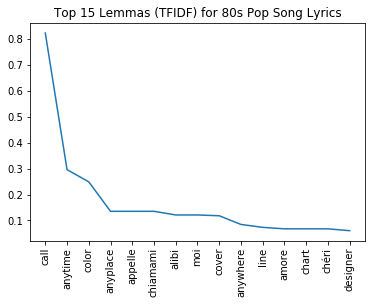

In [8]:
def plot_top_tfidf(series, data_description):
    # Apply 'get lemmas' function to any Pandas Series that we pass in to get lemmas for each row in the Series
    lemmas = series.apply(get_lemmas)
    
    # Initialize Series of lemmas as Gensim Dictionary for further processing
    dictionary = corpora.Dictionary([i for i in lemmas])

    # Convert dictionary into bag of words format: list of (token_id, token_count) tuples
    bow_corpus = [dictionary.doc2bow(text) for text in lemmas]
    
    # Calculate TFIDF based on bag of words counts for each token and return weights:
    tfidf = models.TfidfModel(bow_corpus)
    tfidf_weights = tfidf[bow_corpus[0]]

    # Sort TFIDF weights highest to lowest:
    sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

    # Plot the top 10 weighted words:
    top_15 = {dictionary[k]:v for k,v in sorted_tfidf_weights[:15]} # dictionary comprehension
    plt.plot(list(top_15.keys()), list(top_15.values()))
    plt.xticks(rotation='vertical')
    plt.title('Top 15 Lemmas (TFIDF) for ' + data_description);
    
    return

plot_top_tfidf(df['lyrics'], '80s Pop Song Lyrics')

While the actual lemma for "love" did not come up as one of the 15 most used across 80's pop songs, a variety of words associated with human connection as well as two specifically romantic love-related words came up. For the former, "call", "appelle" and "chiamami" are all indexing a desire to connect, both literally and metaphorically. For the latter, "chéri" and "amore" are directly indexing romantic love relationships. The fact that the italian and french translations of these words came up as commonly used across songs could be considered as evidence of Frith's theory of pop songs as primarily love songs. Italian and French are traditionally conceived to be languages of love, passion, and romance. As such, the preponderance of these words seems to be a version of iconic indexicality where the songwriters are attempting to create an interpretant of a red-tinged, moulin-rougesque passionate love. 

Additionally, the fact that "anytime", "anyplace" and "anywhere" all came up within the top 15 lemmas is directly in line with Frith's theory that pop songs present an unambiguous, unrealistic version of love. These words imply that nothing else matters in the eyes of the speaker (presumably as he/she addresses a lover), especially when taken in combination with "call", "appelle" and "chiamami". 

Now let's look at word2vec to see what context certain love-related words are being used in.

In [10]:
#corpus = df['lyrics'].apply(get_lemmas)
#model = models.word2vec.Word2Vec(corpus, min_count=10, window=10, workers=8)
#model.save('no_ooohs.model')
model = models.KeyedVectors.load('no_ooohs.model')

In [11]:
model.wv.vocab # b/c using gensim 10.0 need to include wv

{'color': <gensim.models.keyedvectors.Vocab at 0x1a2649aa10>,
 'baby': <gensim.models.keyedvectors.Vocab at 0x1a1e436210>,
 'car': <gensim.models.keyedvectors.Vocab at 0x1a1e4362d0>,
 'darling': <gensim.models.keyedvectors.Vocab at 0x1a1e436710>,
 'know': <gensim.models.keyedvectors.Vocab at 0x1a1e436d10>,
 'come': <gensim.models.keyedvectors.Vocab at 0x1a1e436ad0>,
 'comin': <gensim.models.keyedvectors.Vocab at 0x1a1e4366d0>,
 'call': <gensim.models.keyedvectors.Vocab at 0x1a1e436810>,
 'line': <gensim.models.keyedvectors.Vocab at 0x1a1e436a10>,
 'anytime': <gensim.models.keyedvectors.Vocab at 0x1a1e436110>,
 'love': <gensim.models.keyedvectors.Vocab at 0x1a1e436510>,
 'day': <gensim.models.keyedvectors.Vocab at 0x1a1e4360d0>,
 'night': <gensim.models.keyedvectors.Vocab at 0x1a26495b50>,
 'cover': <gensim.models.keyedvectors.Vocab at 0x1a26495450>,
 'kiss': <gensim.models.keyedvectors.Vocab at 0x1a26495e50>,
 'roll': <gensim.models.keyedvectors.Vocab at 0x1a26495750>,
 'sheet': <gensi

In [12]:
print(model.most_similar('love'))

[('need', 0.8916544914245605), ('tell', 0.8403007984161377), ('know', 0.8370179533958435), ('someone', 0.8141990303993225), ('forever', 0.8103464841842651), ('make', 0.8081334829330444), ('give', 0.806310772895813), ('wait', 0.794296383857727), ('believe', 0.7894961833953857), ('straight', 0.7884960770606995)]


/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [15]:
print(model.most_similar('call'))

[('anytime', 0.8620568513870239), ('gloria', 0.8343515396118164), ('song', 0.8061708211898804), ('telephone', 0.8025312423706055), ('voice', 0.8018655776977539), ('ghostbusters', 0.7994076609611511), ('hello', 0.7886329889297485), ('fallin', 0.7820417881011963), ('rest', 0.7798728346824646), ('laugh', 0.7742369174957275)]


/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [14]:
# not in vocab: appelle, chiamami, moi, amore, chéri
print(model.most_similar('baby'))

[('hey', 0.8811994791030884), ('abuse', 0.8791929483413696), ('express', 0.8335103392601013), ('nah', 0.8261178135871887), ('mickey', 0.8142799139022827), ('yes', 0.8054993152618408), ('photograph', 0.8019652366638184), ('stuck', 0.7959164977073669), ('...)', 0.794381320476532), ('stuff', 0.7916924357414246)]


/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [22]:
print(model.most_similar('darling'))

[('sorry', 0.9837069511413574), ('affair', 0.9815880060195923), ('darlin', 0.9783583879470825), ('satisfied', 0.972007691860199), ('mean', 0.9679315090179443), ('knew', 0.9669004678726196), ('hee', 0.9667214751243591), ('wake', 0.9659850001335144), ('rule', 0.9656922817230225), ('promise', 0.9655953645706177)]


/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [23]:
print(model.most_similar('kiss'))

[('list', 0.9621050953865051), ('honey', 0.9319803714752197), ('chocolate', 0.9208346009254456), ('suckle', 0.9207867980003357), ('drip', 0.9189318418502808), ('resist', 0.914422869682312), ('candy', 0.9131041169166565), ('everything', 0.9077900648117065), ('china', 0.9057465195655823), ('tender', 0.8958289623260498)]


/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [24]:
print(model.most_similar('share'))

[('mama', 0.9891117215156555), ('soul', 0.9878588914871216), ('price', 0.987372875213623), ('romance', 0.9862772226333618), ('spend', 0.9860026240348816), ('lead', 0.9848207235336304), ('rose', 0.9836493730545044), ('pretend', 0.9834656715393066), ('sorrow', 0.9829252362251282), ('owner', 0.9828248620033264)]


/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [15]:
print(model.most_similar('romance'))

[('share', 0.9862771034240723), ('chance', 0.9837844371795654), ('soul', 0.983258068561554), ('near', 0.9827077388763428), ('hello', 0.9819372892379761), ('message', 0.9818249940872192), ('stumble', 0.9814887642860413), ('steal', 0.9799895286560059), ('heartbeat', 0.9799574613571167), ('mama', 0.979390025138855)]


/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [26]:
print(model.most_similar('lover'))

[('hear', 0.913966178894043), ('talk', 0.9119666814804077), ('physical', 0.9006530046463013), ('body', 0.9001919031143188), ('shout', 0.826533317565918), ('stranger', 0.8055675029754639), ('forgot', 0.8009803295135498), ('dont', 0.799845278263092), ('dive', 0.7971281409263611), ('show', 0.7949700355529785)]


/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [27]:
print(model.most_similar('always'))

[('would', 0.940835177898407), ('cry', 0.9334453344345093), ('lie', 0.9328467845916748), ('together', 0.9316868782043457), ('time', 0.9279585480690002), ('give', 0.9270365834236145), ('one', 0.920791745185852), ('forever', 0.9190540909767151), ('could', 0.9172757863998413), ('heart', 0.9152398109436035)]


/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [28]:
print(model.most_similar('magic'))

[('eee', 0.9719362854957581), ('sunday', 0.9662037491798401), ('hangin', 0.9657706022262573), ('swear', 0.9641548991203308), ('woah', 0.962590217590332), ('taint', 0.9614478945732117), ('halfway', 0.9585478901863098), ('tough', 0.9568237066268921), ('degree', 0.9536724090576172), ('wo', 0.9501624703407288)]


/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [29]:
print(model.most_similar('destiny'))

[('wide', 0.9967312812805176), ('least', 0.9962567687034607), ('grow', 0.9947332739830017), ('lifetime', 0.994666576385498), ('yesterday', 0.9946611523628235), ('hiding', 0.9945323467254639), ('remind', 0.9944868683815002), ('careful', 0.9942986965179443), ('felt', 0.9941995143890381), ('broken', 0.993867039680481)]


/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [30]:
print(model.most_similar('fantasy'))

[('page', 0.9956697225570679), ('freedom', 0.9913723468780518), ('willing', 0.9913380742073059), ('mm', 0.9897850751876831), ('rough', 0.988446831703186), ('china', 0.9884244203567505), ('capture', 0.9876656532287598), ('cowboy', 0.987175703048706), ('tryin', 0.9871329069137573), ('dreamin', 0.9870057106018066)]


/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


It doesn't seem like there's a distinct pattern going on here. The only two associations that seem to support the TFIDF findings are "love"-"forever" and "call"-"anytime". Surprisingly, other more negative themes come out of these associations. For example, "darling" was mostly associated with "affair", "sorry" and "promise" (presumably the breaking of a promise). This doesn't directly contradict Frith's theories since most songs do seem to be talking about love in an idyllic way, but the fact that these exist means some of them are not conforming to the love formula he posits. Another particularly scary theme that comes out is the associations with "baby": "abuse", "stuck" and an ambivalence ("yes", "nah", maybe even "..."). Very far from idyllic indeed. 

Now let's look at valence and positive sentiment in love and non-love songs.

In [8]:
# get lemmas for all lyrics
lemmas = df['lyrics'].apply(get_lemmas)
lemmas

1385    [color, color, baby, color, car, color, color,...
1386    [come, take, hand, know, always, mind, know, k...
1387    [girl, close, eye, let, rhythm, get, try, figh...
1388    [one, time, never, enough, man, like, one, tim...
1389    [want, love, last, forever, one, never, fade, ...
                              ...                        
2139    [cruel, deep, eye, blood, like, ice, one, look...
2140    [come, window, sound, crescendo, come, apartme...
2141    [baby, let, right, lady, know, need, want, hol...
2142    [remember, day, long, roll, beneath, deep, blu...
2143    [keep, move, stop, like, hand, time, click, cl...
Name: lyrics, Length: 759, dtype: object

In [9]:
# create lovey_dovey index where song is classified as "yes" if it has the word love in it at least three times
lovey_dovey = ["Yes" if i.count("love") >=3 else "No" for i in lemmas]
lovey_dovey

['Yes',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',


In [10]:
df['lovey_dovey'] = lovey_dovey # add it as a column to the dataframe

#### Valence

In [19]:
# run an independent samples t-test for the valence means across love_dovey
ttest_ind(*df.groupby('lovey_dovey')['valence'].apply(lambda x:list(x)))

Ttest_indResult(statistic=3.018399706656276, pvalue=0.0026264113947373573)

[Text(0, 0.5, 'Mean Valence Score'), Text(0.5, 0, 'Love Song?')]

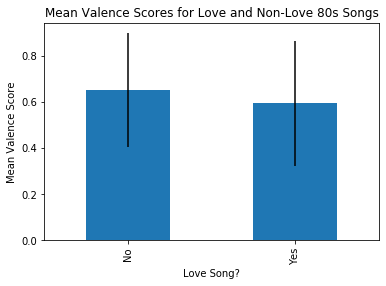

In [20]:
# make a simple plot of the means with error bars
error = df.groupby('lovey_dovey')['valence'].std()
ax = df.groupby('lovey_dovey')['valence'].mean().plot(title = "Mean Valence Scores for Love and Non-Love 80s Songs",
                                                kind = 'bar', yerr = error);
ax.set(xlabel = "Love Song?", ylabel = "Mean Valence Score")

While the difference in the means is significant, with non-love songs having a more positive valence, the difference does not really seem to be something worth caring about. Altogether, it doesn't seem like musical valence is one of the mechanisms the songs are using to portray their love content as being idyllic or happy.

### Positive Sentiment

In [21]:
# run an independent samples t-test for the sentiment means across love_dovey
ttest_ind(*df.groupby('lovey_dovey')['pos'].apply(lambda x:list(x)))

Ttest_indResult(statistic=-15.092066060788632, pvalue=3.4575985290185616e-45)

[Text(0, 0.5, 'Mean Positive Sentiment Score'), Text(0.5, 0, 'Love Song?')]

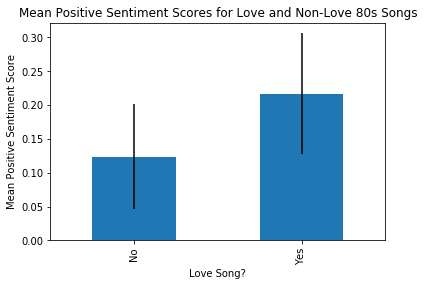

In [22]:
# make a simple plot of the means with error bars
error = df.groupby('lovey_dovey')['pos'].std()
ax = df.groupby('lovey_dovey')['pos'].mean().plot(title = "Mean Positive Sentiment Scores for Love and Non-Love 80s Songs",
                                                kind = 'bar', yerr = error);
ax.set(xlabel = "Love Song?", ylabel = "Mean Positive Sentiment Score")

While looking at valence defined by musicality not much seemed to come up, content valence is a different story. Love songs do indeed have a significantly more positive sentimentality as determined by lyric content. This is directly in line with Frith's idea of a "happy-go-lucky" love formula. Go Frith!

# Question 2

So it seems that Frith's theory of pop songs as idyllic, unambiguous (and unrealistic) love songs generally holds up. A potential explanation for the preponderance and preoccupation with love in popular songs could be that, from an evolutionary perspective, social isolation is an inherently stressful situation that serves as a motivational drive to seek out human connection. For social animals (humans are the most social of all mammals), being isolated from the group is an actual existential threat as it makes the individual more vulnerable to predation and less able to obtain resources. For this reason, in today's human, feeling lonely motivates individuals to seek out social connection and reentry into the safety of a social group. If this is a theory that is driving the love formula stipulated by Frith, we should see a common interpretant in love songs as love being a way to avoid loneliness or a general fear of isolation and being alone. To test if this legisign relationship exists, I will first explore topics that come out of love and non-love songs. Then I will look at word2vec to see if there are more loneliness associations in love vs. non-love songs.

## Topic Modeling by Group

In [11]:
# create a filtered dataframe that only includes love songs with their respective love lemmas
love_df = df[df['lovey_dovey']=='Yes']
love_df['love_lemmas']= love_df['lyrics'].apply(get_lemmas)
love_df.head()

/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,lyrics,num_syllables,pos,year,fog_index,flesch_index,num_words,num_lines,title,f_k_grade,...,time_signature,uri,analysis_url,artist_with_features,year_bin,image,cluster,Gender,lovey_dovey,love_lemmas
1385,"Color me your color, baby\nColor me your car\n...",304.2,0.173,1980,4.0,91.78,229,39,Call Me,1.7,...,4,spotify:track:0vLwL4xuJ3s7SeaCdvMqkY,https://api.spotify.com/v1/audio-analysis/0vLw...,NaN,80s,https://i.scdn.co/image/dbd371b220a054a542279f...,String Lover,Group,Yes,"[color, color, baby, color, car, color, color,..."
1387,"Girl, close your eyes\nLet that rhythm get int...",290.7,0.124,1980,4.0,108.70,254,44,Rock With You,-0.7,...,4,spotify:track:7oOOI85fVQvVnK5ynNMdW7,https://api.spotify.com/v1/audio-analysis/7oOO...,NaN,80s,https://i.scdn.co/image/51dad9aaabe56438188402...,Poetic,male,Yes,"[girl, close, eye, let, rhythm, get, try, figh..."
1393,Baby let's cruise away from here\nDon't be con...,359.1,0.286,1980,4.8,89.75,280,38,Cruisin',2.5,...,4,spotify:track:7cTIXlrYGoojiT5Kq0WNbR,https://api.spotify.com/v1/audio-analysis/7cTI...,NaN,80s,https://www.tabithaknowel.com/integrated/uploa...,String Lover,male,Yes,"[baby, let, cruise, away, confuse, baby, way, ..."
1394,I realize the best part of love is the thinnes...,391.5,0.273,1980,5.6,104.64,353,36,Lost In Love,0.9,...,4,spotify:track:6MhK1gPrgtgRedEjSUz18I,https://api.spotify.com/v1/audio-analysis/6MhK...,NaN,80s,https://www.tabithaknowel.com/integrated/uploa...,String Lover,Group,Yes,"[realize, best, part, love, thinnest, slice, c..."
1395,"Oh, little Jeannie\nYou got so much love\nLitt...",419.4,0.207,1980,4.4,99.23,348,51,Little Jeannie,0.9,...,4,spotify:track:19Kf8FxBJ5a1Bb8uKCrIIe,https://api.spotify.com/v1/audio-analysis/19Kf...,NaN,80s,https://i.scdn.co/image/8b9b906a508209d627e3b1...,String Lover,male,Yes,"[oh, little, jeannie, get, much, love, little,..."


In [12]:
# create a filtered dataframe that only includes non-love songs with their respective non-love lemmas
non_love_df = df[df['lovey_dovey']=='No']
non_love_df['non_love_lemmas']= non_love_df['lyrics'].apply(get_lemmas)
non_love_df.head()

/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,lyrics,num_syllables,pos,year,fog_index,flesch_index,num_words,num_lines,title,f_k_grade,...,time_signature,uri,analysis_url,artist_with_features,year_bin,image,cluster,Gender,lovey_dovey,non_love_lemmas
1386,Come take my hand\nYou should know me\nI've al...,308.7,0.204,1980,4.0,91.78,244,41,Magic,1.7,...,4,spotify:track:5Zpjf07lpZxADR0vWZnTtL,https://api.spotify.com/v1/audio-analysis/5Zpj...,NaN,80s,https://i.scdn.co/image/a9c4bea41f06c1be30efa9...,String Lover,female,No,"[come, take, hand, know, always, mind, know, k..."
1388,Do that to me one more time\nOnce is never eno...,254.7,0.112,1980,4.8,89.75,200,26,Do That To Me One More Time,2.5,...,4,spotify:track:4NYJZhGW8fHbGmweplQQwv,https://api.spotify.com/v1/audio-analysis/4NYJ...,Captain & Tennille,80s,https://i.scdn.co/image/3a01eb4ab84de08dd5d380...,String Lover,Group,No,"[one, time, never, enough, man, like, one, tim..."
1389,You want a love to last forever\nOne that will...,261.0,0.286,1980,4.0,91.78,198,34,Coming Up,1.7,...,4,spotify:track:53jTDzYAxzIJRBUU7tpUNM,https://api.spotify.com/v1/audio-analysis/53jT...,NaN,80s,https://i.scdn.co/image/cc1f9a3f3c93481439ff6b...,String Lover,male,No,"[want, love, last, forever, one, never, fade, ..."
1390,Gotta make a move to a town that's right for m...,390.6,0.032,1980,4.0,91.78,296,50,Funkytown,1.7,...,4,spotify:track:0B5kY9i9bmP7554oU4jRoO,https://api.spotify.com/v1/audio-analysis/0B5k...,Lipps Inc.,80s,https://www.tabithaknowel.com/integrated/uploa...,String Lover,Group,No,"[gotta, make, move, town, right, town, keep, m..."
1391,What's the matter with the clothes I'm wearing...,385.2,0.121,1980,5.2,97.20,319,39,It's Still Rock And Roll To Me,1.7,...,4,spotify:track:7LbOQt7isddrw3Bs3Czl7E,https://api.spotify.com/v1/audio-analysis/7LbO...,NaN,80s,https://i.scdn.co/image/0488b8c02bc9249ddf858e...,String Lover,male,No,"[matter, clothes, wear, tell, tie, wide, ?"", m..."


## Love Songs - Topic Modeling

In [15]:
# Initialize Series of lemmas as Gensim Dictionary for further processing
love_dictionary = corpora.Dictionary([i for i in love_df['love_lemmas']])

# Convert dictionary into bag of words format: list of (token_id, token_count) tuples
love_bow_corpus = [love_dictionary.doc2bow(text) for text in love_df['love_lemmas']]

In [16]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers=8)
        model_list.append(model)
        coherence_model = models.coherencemodel.CoherenceModel(model=model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

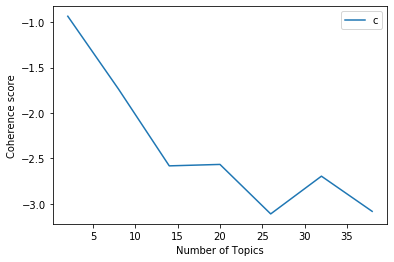

In [17]:
model_list, coherence_values = compute_coherence_values(dictionary=love_dictionary, corpus=love_bow_corpus, texts=love_df['love_lemmas'], start=2, limit=40, step=6)
plt.plot(range(2, 40, 6), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best');

Because it seems to go downhill pretty steeply, I will only use two topics.

In [33]:
# Fit optimal LDA Model based on bag of words counts for each token and return weights:
ldamodel = models.ldamulticore.LdaMulticore(bow_corpus, num_topics=2, id2word=dictionary, workers=8, passes=20, iterations=400)
# For single-core processing:
#ldamodel = models.ldamodel.LdaModel(bow_corpus, num_topics = 5, id2word=dictionary, passes=20, iterations=400)

ldamodel.save('love.model')
#ldamodel = models.ldamodel.LdaModel.load('lda5p20_i400.model')
topics = ldamodel.print_topics(num_words=20)

for topic in topics:
    print(topic)

(0, '0.033*"love" + 0.015*"want" + 0.014*"get" + 0.012*"girl" + 0.010*"make" + 0.010*"like" + 0.010*"know" + 0.010*"baby" + 0.009*"night" + 0.008*"say" + 0.008*"go" + 0.008*"feel" + 0.007*"right" + 0.007*"turn" + 0.007*"need" + 0.007*"passion" + 0.007*"give" + 0.007*"around" + 0.006*"red" + 0.006*"eye"')
(1, '0.076*"love" + 0.023*"oh" + 0.020*"know" + 0.016*"baby" + 0.015*"get" + 0.013*"go" + 0.013*"say" + 0.013*"let" + 0.012*"make" + 0.012*"time" + 0.012*"feel" + 0.010*"heart" + 0.010*"yeah" + 0.009*"want" + 0.009*"one" + 0.009*"like" + 0.008*"tell" + 0.008*"come" + 0.008*"need" + 0.007*"never"')


In [36]:
def top_love_songs_by_topic(ldamodel, corpus, ntop=1):
    topn_songs_by_topic = {}
    for i in range(len(ldamodel.print_topics())):
        # For each topic, collect the most representative song(s) (i.e. highest probability containing words belonging to topic):
        top = sorted(zip(range(len(corpus)), ldamodel[corpus]), reverse=True, key=lambda x: abs(dict(x[1]).get(i, 0.0)))
        topn_songs_by_topic[i] = [j[0] for j in top[:ntop]]
        # Print out the topn songs for each topic and return their indices as a dictionary for further analysis:
        print("Topic " + str(i))
        print(love_df[['title','year','artist']].iloc[topn_songs_by_topic[i]])
        print("*******************************")
    return topn_songs_by_topic

In [38]:
top_love_songs_by_topic = top_love_songs_by_topic(ldamodel, bow_corpus, ntop=10)

Topic 0
                          title  year           artist
2026               Red Red Wine  1988             UB40
1647              Dirty Laundry  1983       Don Henley
2118   Sowing The Seeds Of Love  1989  Tears For Fears
2101             Buffalo Stance  1989     Neneh Cherry
1966             La Isla Bonita  1987          Madonna
1757  Church Of The Poison Mind  1984     Culture Club
1397                Upside Down  1980       Diana Ross
1820            Smooth Operator  1985             Sade
1699            Karma Chameleon  1984     Culture Club
2121          Funky Cold Medina  1989         Tone Loc
*******************************
Topic 1
                            title  year                     artist
1606                      Do I Do  1982              Stevie Wonder
1835        Method Of Modern Love  1985  Daryl Hall and John Oates
1857             Addicted To Love  1986              Robert Palmer
1792                  Cool It Now  1985                New Edition
2095  Baby D

As was hinted at by the topic coherence graph, it doesn't seem like these are breaking into two different topics very clearly. After looking through the lyrics for a couple songs in each topic, it seems that both are talking about the feelings surrounding being in love. Nonetheless, while this method has proven a bit fruitless, the lyrics in these songs (as main representatives of whatever latent factors may underlie 80's pop music) hint at the fact that loneliness is definitely featuring in these love songs. For example, Van Halen sings "Everybody's lookin' for somethin' // Somethin' to fill in the holes // We think a lot but don't talk much about it". Maybe Word2Vec will be able to get at this more clearly.

## Non-Love Songs - Topic Modeling

In [13]:
# Initialize Series of lemmas as Gensim Dictionary for further processing
non_love_dictionary = corpora.Dictionary([i for i in non_love_df['non_love_lemmas']])

# Convert dictionary into bag of words format: list of (token_id, token_count) tuples
non_love_bow_corpus = [non_love_dictionary.doc2bow(text) for text in non_love_df['non_love_lemmas']]

In [14]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers=8)
        model_list.append(model)
        coherence_model = models.coherencemodel.CoherenceModel(model=model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

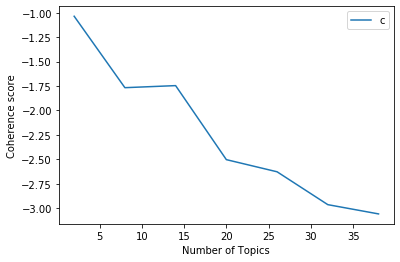

In [15]:
model_list, coherence_values = compute_coherence_values(dictionary=non_love_dictionary, corpus=non_love_bow_corpus, texts=non_love_df['non_love_lemmas'], start=2, limit=40, step=6)
plt.plot(range(2, 40, 6), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best');

Since the coherence score reaches -1.5 (the score I chose as the cut-off for the love songs) at around 5 topics, I'll go with 5.

In [16]:
# Fit optimal LDA Model based on bag of words counts for each token and return weights:
ldamodel = models.ldamulticore.LdaMulticore(non_love_bow_corpus, num_topics=5, id2word=non_love_dictionary, workers=8, passes=20, iterations=400)
# For single-core processing:
#ldamodel = models.ldamodel.LdaModel(bow_corpus, num_topics = 5, id2word=dictionary, passes=20, iterations=400)

ldamodel.save('non_love.model')
#ldamodel = models.ldamodel.LdaModel.load('lda5p20_i400.model')
topics = ldamodel.print_topics(num_words=20)

for topic in topics:
    print(topic)

(0, '0.045*"oh" + 0.030*"night" + 0.016*"take" + 0.013*"come" + 0.012*"go" + 0.012*"whoa" + 0.011*"know" + 0.010*"see" + 0.009*"home" + 0.009*"yeah" + 0.009*"long" + 0.008*"feel" + 0.008*"get" + 0.008*"tonight" + 0.008*"like" + 0.008*"city" + 0.007*"away" + 0.006*"keep" + 0.006*"hand" + 0.006*"want"')
(1, '0.041*"get" + 0.019*"say" + 0.018*"know" + 0.017*"baby" + 0.014*"gonna" + 0.014*"oh" + 0.011*"go" + 0.010*"time" + 0.009*"think" + 0.009*"take" + 0.008*"make" + 0.008*"back" + 0.008*"yeah" + 0.007*"want" + 0.007*"come" + 0.007*"hold" + 0.007*"right" + 0.007*"way" + 0.007*"well" + 0.006*"never"')
(2, '0.021*"know" + 0.020*"want" + 0.020*"time" + 0.019*"oh" + 0.015*"come" + 0.014*"make" + 0.014*"get" + 0.013*"like" + 0.013*"go" + 0.012*"let" + 0.011*"yeah" + 0.011*"feel" + 0.011*"take" + 0.011*"see" + 0.010*"dance" + 0.010*"one" + 0.010*"never" + 0.008*"way" + 0.008*"give" + 0.008*"need"')
(3, '0.061*"na" + 0.017*"oh" + 0.016*"yeah" + 0.015*"get" + 0.015*"bad" + 0.012*"like" + 0.010*"k

In [17]:
def top_non_love_songs_by_topic(ldamodel, corpus, ntop=1):
    topn_songs_by_topic = {}
    for i in range(len(ldamodel.print_topics())):
        # For each topic, collect the most representative song(s) (i.e. highest probability containing words belonging to topic):
        top = sorted(zip(range(len(corpus)), ldamodel[corpus]), reverse=True, key=lambda x: abs(dict(x[1]).get(i, 0.0)))
        topn_songs_by_topic[i] = [j[0] for j in top[:ntop]]
        # Print out the topn songs for each topic and return their indices as a dictionary for further analysis:
        print("Topic " + str(i))
        print(non_love_df[['title','year','artist']].iloc[topn_songs_by_topic[i]])
        print("*******************************")
    return topn_songs_by_topic

In [18]:
top_non_love_songs_by_topic = top_non_love_songs_by_topic(ldamodel, non_love_bow_corpus, ntop=10)

Topic 0
                           title  year           artist
2140             Smooth Criminal  1989  Michael Jackson
2136               Paradise City  1989    Guns N' Roses
1701              All Night Long  1984    Lionel Richie
1754                    Thriller  1984  Michael Jackson
1803  Things Can Only Get Better  1985     Howard Jones
1782          We Built This City  1985         Starship
1746       Cum On Feel The Noize  1984       Quiet Riot
1899        Take Me Home Tonight  1986      Eddie Money
1898                       Nasty  1986    Janet Jackson
1651             Rock The Casbah  1983            Clash
*******************************
Topic 1
                                     title  year             artist
2106                           Bust A Move  1989         Young M.C.
1684                      Pass The Dutchie  1983      Musical Youth
1595                        Get Down On It  1982  Kool and The Gang
1990                        Right On Track  1987     Breakfast C

The first topic seems to be generally about anger, evil and fear, though the relationship between the songs in it is not very clear. The second topic is probably the most cohesive of the five, with most representative songs being about trying to "get the girl". The third topic seems to be based on running away, or something that's coming after someone. The fourth topic is somewhat about "the look", with most songs referencing expressive or inexpressive eyes or gaze. The fifth topic is the most incoherent. While it may be a stretch, one might claim that it somewhat revolves around masked intentions, though the fit seems pretty awful. 

It's interesting that, even though these are the non-love songs, "get the girl" still came up, perhaps demonstrating that there is a strong preoccupation for romantic relationships even when the song is not explicitly about this. In summary, though, it doesn't seem that topic modelling has provided much information about whether there is a common interpretant of loneliness or a fear of being alone. Let's see what word2vec will bring!

## Word2Vec for Loneliness - Love Songs

In [27]:
love_corpus = love_df['love_lemmas']
model = models.word2vec.Word2Vec(love_corpus, min_count=10, window=10, workers=8)
model.save('love_wv.model')
#model = models.KeyedVectors.load('love_wv.model')

In [28]:
model.wv.vocab

{'color': <gensim.models.keyedvectors.Vocab at 0x1a309ca990>,
 'baby': <gensim.models.keyedvectors.Vocab at 0x1a2450afd0>,
 'car': <gensim.models.keyedvectors.Vocab at 0x1a309cd250>,
 'darling': <gensim.models.keyedvectors.Vocab at 0x1a309cd290>,
 'know': <gensim.models.keyedvectors.Vocab at 0x1a309cd350>,
 'come': <gensim.models.keyedvectors.Vocab at 0x1a309cd3d0>,
 'call': <gensim.models.keyedvectors.Vocab at 0x1a309cd410>,
 'line': <gensim.models.keyedvectors.Vocab at 0x1a309cd450>,
 'anytime': <gensim.models.keyedvectors.Vocab at 0x1a309cd310>,
 'love': <gensim.models.keyedvectors.Vocab at 0x1a309cd390>,
 'day': <gensim.models.keyedvectors.Vocab at 0x1a309cd490>,
 'night': <gensim.models.keyedvectors.Vocab at 0x1a309cd4d0>,
 'cover': <gensim.models.keyedvectors.Vocab at 0x1a309cd510>,
 'kiss': <gensim.models.keyedvectors.Vocab at 0x1a309cd550>,
 'roll': <gensim.models.keyedvectors.Vocab at 0x1a309cd590>,
 'never': <gensim.models.keyedvectors.Vocab at 0x1a309cd5d0>,
 'get': <gensim.

In [29]:
print(model.most_similar('lonely'))

[('leave', 0.9995982646942139), ('home', 0.9995545744895935), ('far', 0.9994811415672302), ('still', 0.9994455575942993), ('many', 0.999443769454956), ('use', 0.999439001083374), ('till', 0.9994356632232666), ('chance', 0.9994262456893921), ('knew', 0.9994239807128906), ('maybe', 0.9994165301322937)]


/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [30]:
print(model.most_similar('alone'))

[('matter', 0.9996446967124939), ('living', 0.9996294975280762), ('till', 0.9996253252029419), ('many', 0.9995749592781067), ('carry', 0.9995176792144775), ('worth', 0.9994724988937378), ('fly', 0.9994666576385498), ('far', 0.9994475841522217), ('use', 0.9994329214096069), ('inside', 0.9994239807128906)]


/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


## Word2Vec for Loneliness - Non-Love Songs

In [20]:
love_corpus = non_love_df['non_love_lemmas']
model = models.word2vec.Word2Vec(love_corpus, min_count=10, window=10, workers=8)
model.save('non_love_wv.model')
#model = models.KeyedVectors.load('non_love_wv.model')

In [21]:
model.wv.vocab

{'come': <gensim.models.keyedvectors.Vocab at 0x1a24728f10>,
 'take': <gensim.models.keyedvectors.Vocab at 0x1a2470bed0>,
 'hand': <gensim.models.keyedvectors.Vocab at 0x1a2470b390>,
 'know': <gensim.models.keyedvectors.Vocab at 0x1a2d008fd0>,
 'always': <gensim.models.keyedvectors.Vocab at 0x1a2d39a9d0>,
 'mind': <gensim.models.keyedvectors.Vocab at 0x1a2d39aa50>,
 'kind': <gensim.models.keyedvectors.Vocab at 0x1a2d39aad0>,
 'guide': <gensim.models.keyedvectors.Vocab at 0x1a2d39ab10>,
 'dream': <gensim.models.keyedvectors.Vocab at 0x1a2d39a8d0>,
 'start': <gensim.models.keyedvectors.Vocab at 0x1a2d39aa10>,
 'road': <gensim.models.keyedvectors.Vocab at 0x1a2d39ab50>,
 'make': <gensim.models.keyedvectors.Vocab at 0x1a2d39ab90>,
 'mistake': <gensim.models.keyedvectors.Vocab at 0x1a2d39abd0>,
 'believe': <gensim.models.keyedvectors.Vocab at 0x1a2d39ac10>,
 'magic': <gensim.models.keyedvectors.Vocab at 0x1a2d39ac50>,
 'nothin': <gensim.models.keyedvectors.Vocab at 0x1a2d39ac90>,
 'stand': 

In [24]:
print(model.most_similar('lonely'))

[('forever', 0.9933451414108276), ('away', 0.9867328405380249), ('heart', 0.9850693941116333), ('one', 0.98340904712677), ('need', 0.981306791305542), ('run', 0.9783655405044556), ('give', 0.9777202606201172), ('two', 0.9776791334152222), ('love', 0.9776264429092407), ('keep', 0.9773646593093872)]


/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [26]:
print(model.most_similar('alone'))

[('ask', 0.9972202181816101), ('year', 0.9967536330223083), ('find', 0.9967144727706909), ('tear', 0.9965338706970215), ('waste', 0.9964192509651184), ('start', 0.9957689046859741), ('hero', 0.9955030083656311), ('someday', 0.9954738616943359), ('hard', 0.9953367710113525), ('told', 0.9953210353851318)]


/Users/Anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In the non-love songs, the word "lonely" was actually associated with "love" even though it wasn't in the love songs! One interpretation of this is that, while the love songs are not preoccupied with being lonely because there is presumably a form of love in them, the non-love songs are preoccupied with being lonely and thus are worried about obtaining love. This would support the theorized legisign relationship (fear of loneliness, love as a way to avoid this). The association between "lonely" and "forever" (as well as potentially the association between "alone" and "someday") may also be referring to a fear of being alone forever, i.e. not being able to find love. Being alone seems to generally be described as a negative state in the non-love songs ("hard", "waste", "tear"), and potentially in the love songs by the association between "alone" and "worth", "living" and "matter" (i.e. does anything matter? Is it even worth living?). Additionally, the association between "lonely" and "leave" in the love songs possibly implies that if one "leaves" the relationship the song might be talking about, one will inevitably be "lonely". In sum, it does seem like word2vec support the hypothesized legisign relationship.

## Conclusion

To summarize, it does seem like Frith's theory that pop songs (at least in the 80's) are presenting an idyllic, unambiguous, unrealistic version of love. This is evidenced by both the TFIDF analysis and the positive sentiment content analysis. Nonetheless, it is less supported (though also not disproved) by the word2vec analyses and the musical valence difference between love and non-love songs. 

Additionally, though the topic modeling analysis of love vs. non-love songs was not very useful, it seems that word2vec was able to bring out associations that supported the theorized legisign relationship where a common interpretant of a fear of being alone is produced (though not in the love songs, as predicted, but rather mostly in the non-love songs).